# Extract from audio

In [1]:
import librosa
import librosa.display
import numpy as np

# Chargement du fichier audio .wav
audio_path = "../blues.00000.wav"
y, sr = librosa.load(audio_path)

In [2]:
# Exemple d'extraction de caractéristiques
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

In [3]:
print("tempo:", tempo)

tempo: 123.046875


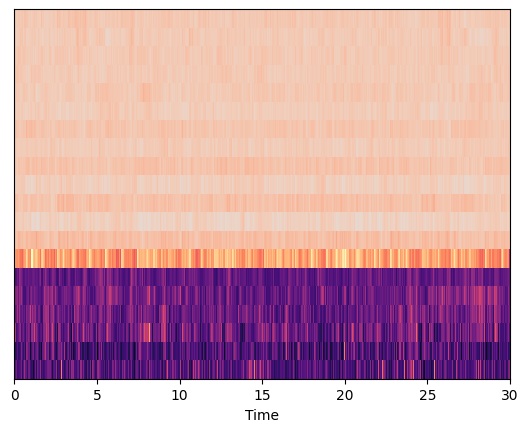

In [4]:
# Exemple d'affichage des caractéristiques
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
librosa.display.specshow(mfccs, x_axis='time')
librosa.display.specshow(spectral_contrast, x_axis='time')

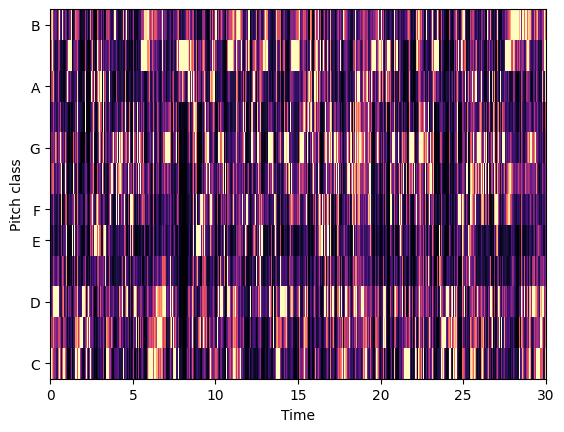

In [5]:
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')

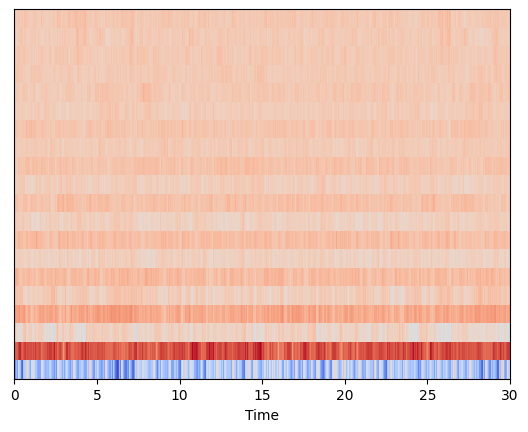

In [6]:
librosa.display.specshow(mfccs, x_axis='time')


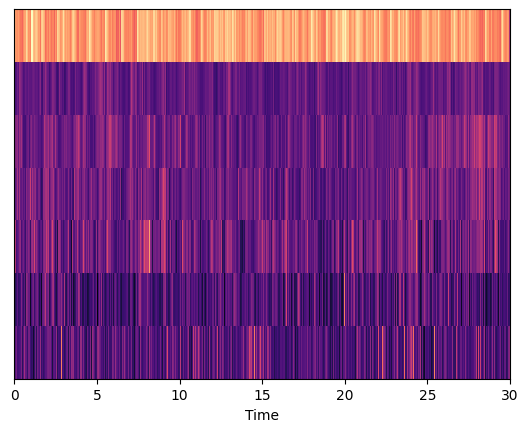

In [7]:
librosa.display.specshow(spectral_contrast, x_axis='time')

In [8]:
# Vous pouvez également extraire des informations comme le tempo, le rythme, etc.
print("Tempo:", tempo)

Tempo: 123.046875


# Extract from dataset (h5 file)

In [10]:
import h5py

h5_file_path = "TRAAAAW128F429D538.h5"

# Charger les données pertinentes à partir du fichier .h5
with h5py.File(h5_file_path, "r") as h5file:
    segments_timbre = h5file["/analysis/segments_timbre"][:]

# Transposer les segments timbre pour avoir le même format que les MFCC
mfccs_h5 = segments_timbre.T  # Les MFCC seront dans le format (nombre de coefficients, nombre de segments)

In [18]:
mfccs_h5.shape, mfccs_h5

((12, 971),
 array([[ 0.00000e+00,  1.99910e+01,  2.05970e+01, ...,  2.44160e+01,
          4.16210e+01,  3.71950e+01],
        [ 1.71130e+02, -1.43504e+02, -2.03829e+02, ..., -8.00690e+01,
          3.42380e+01,  1.21030e+02],
        [ 9.46900e+00, -1.18249e+02, -1.59915e+02, ..., -1.20022e+02,
         -2.85390e+01, -7.98630e+01],
        ...,
        [ 9.73000e-01,  3.81060e+01,  9.46000e+00, ...,  9.11800e+00,
          2.14910e+01,  1.93330e+01],
        [-1.06400e+01, -2.76000e+00, -1.53300e+01, ..., -9.64400e+00,
          3.41890e+01, -2.18400e+01],
        [-7.22800e+00, -1.90030e+01, -2.10790e+01, ...,  1.32000e-01,
         -9.64400e+00,  1.69290e+01]]))

In [15]:
# Transposer les MFCC extraits des fichiers .h5 pour les aligner avec le format des MFCC des fichiers .wav
mfccs_h5_aligned = mfccs_h5.T

In [16]:
mfccs_h5_aligned.shape, mfccs_h5_aligned

((971, 12),
 array([[ 0.00000e+00,  1.71130e+02,  9.46900e+00, ...,  9.73000e-01,
         -1.06400e+01, -7.22800e+00],
        [ 1.99910e+01, -1.43504e+02, -1.18249e+02, ...,  3.81060e+01,
         -2.76000e+00, -1.90030e+01],
        [ 2.05970e+01, -2.03829e+02, -1.59915e+02, ...,  9.46000e+00,
         -1.53300e+01, -2.10790e+01],
        ...,
        [ 2.44160e+01, -8.00690e+01, -1.20022e+02, ...,  9.11800e+00,
         -9.64400e+00,  1.32000e-01],
        [ 4.16210e+01,  3.42380e+01, -2.85390e+01, ...,  2.14910e+01,
          3.41890e+01, -9.64400e+00],
        [ 3.71950e+01,  1.21030e+02, -7.98630e+01, ...,  1.93330e+01,
         -2.18400e+01,  1.69290e+01]]))

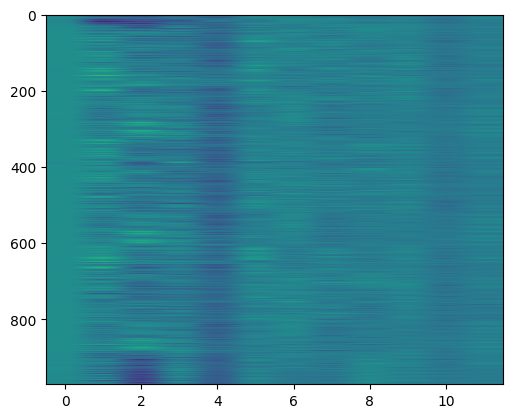

In [32]:
import matplotlib.pyplot as plt

plt.imshow(mfccs_h5_aligned, aspect=0.01)

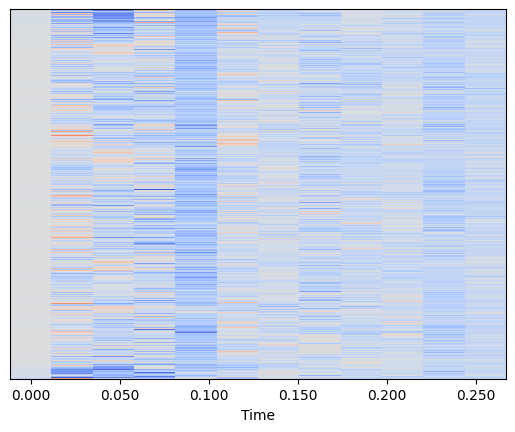

In [19]:
librosa.display.specshow(mfccs_h5_aligned, x_axis='time')

Segments Pitches (Chroma) - Shape: (12, 1293)
Segments Timbres (MFCC) - Shape: (20, 1293)


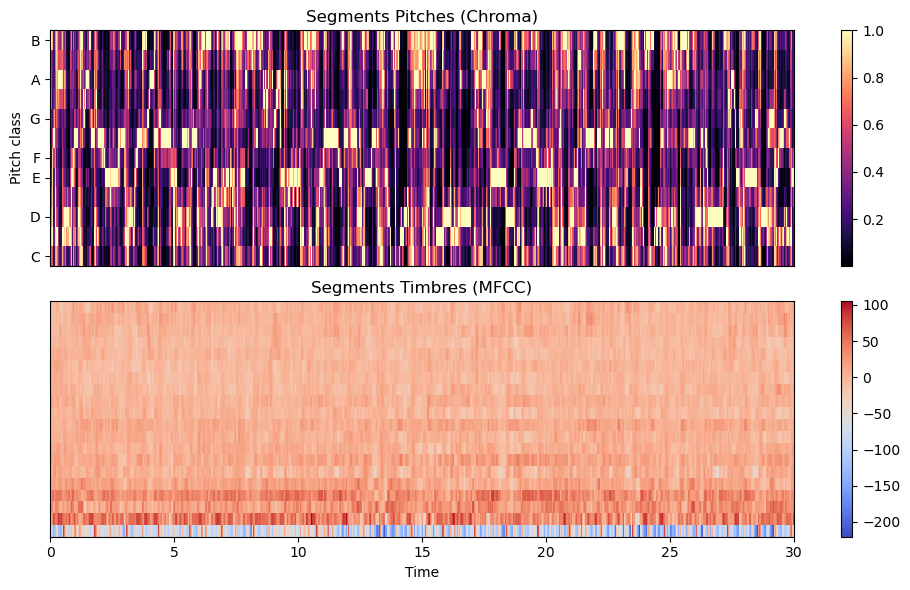

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier audio
file_path = 'pop.00075.wav'
y, sr = librosa.load(file_path)

# Extraire les segments_pitches et les segments_timbres
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Afficher la shape des résultats
print("Segments Pitches (Chroma) - Shape:", chroma.shape)
print("Segments Timbres (MFCC) - Shape:", mfccs.shape)

# Afficher les résultats
plt.figure(figsize=(10, 6))

# Afficher les segments_pitches (chroma)
plt.subplot(2, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma')
plt.colorbar()
plt.title('Segments Pitches (Chroma)')

# Afficher les segments_timbres (MFCC)
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Segments Timbres (MFCC)')

plt.tight_layout()
plt.show()

Segments Pitches (Chroma) - Shape: (12, 1293)
Segments Timbres (MFCC) - Shape: (12, 1293)


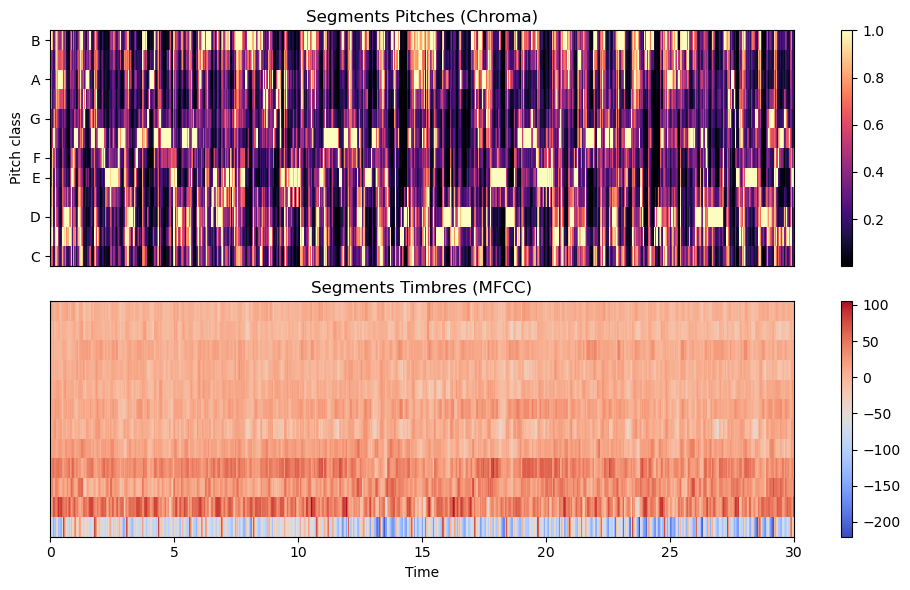

In [2]:
# Charger le fichier audio
file_path = 'pop.00075.wav'
y, sr = librosa.load(file_path)
num_mfcc = 12

# Extraire les segments_pitches et les segments_timbres
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)

# Afficher la shape des résultats
print("Segments Pitches (Chroma) - Shape:", chroma.shape)
print("Segments Timbres (MFCC) - Shape:", mfccs.shape)

# Afficher les résultats
plt.figure(figsize=(10, 6))

# Afficher les segments_pitches (chroma)
plt.subplot(2, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma')
plt.colorbar()
plt.title('Segments Pitches (Chroma)')

# Afficher les segments_timbres (MFCC)
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Segments Timbres (MFCC)')

plt.tight_layout()
plt.show()

### CSV SANS LOUDNESS

In [16]:
import librosa
import pandas as pd

# Charger le fichier audio
file_path = 'pop.00075.wav'
y, sr = librosa.load(file_path)
num_mfcc = 12

# Extraire les segments_pitches et les segments_timbres
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)

# Calculer les moyennes pour chaque coefficient
chroma_mean = chroma.mean(axis=1)
mfccs_mean = mfccs.mean(axis=1)

# Créer un DataFrame pour stocker les moyennes
data = {
    'chr1': chroma_mean[0], 'chr2': chroma_mean[1], 'chr3': chroma_mean[2],
    'chr4': chroma_mean[3], 'chr5': chroma_mean[4], 'chr6': chroma_mean[5],
    'chr7': chroma_mean[6], 'chr8': chroma_mean[7], 'chr9': chroma_mean[8],
    'chr10': chroma_mean[9], 'chr11': chroma_mean[10], 'chr12': chroma_mean[11],
    'mfcc1': mfccs_mean[0], 'mfcc2': mfccs_mean[1], 'mfcc3': mfccs_mean[2],
    'mfcc4': mfccs_mean[3], 'mfcc5': mfccs_mean[4], 'mfcc6': mfccs_mean[5],
    'mfcc7': mfccs_mean[6], 'mfcc8': mfccs_mean[7], 'mfcc9': mfccs_mean[8],
    'mfcc10': mfccs_mean[9], 'mfcc11': mfccs_mean[10], 'mfcc12': mfccs_mean[11]
}

df = pd.DataFrame([data])
df

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
0,0.410688,0.470735,0.47855,0.385496,0.4159,0.339307,0.469413,0.333368,0.325756,0.388783,...,25.370588,35.756512,13.383733,2.827908,12.753467,4.485296,3.351615,10.027184,-2.3805,2.991067


In [12]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier audio WAV
file_path = 'pop.00075.wav'
y, sr = librosa.load(file_path)

# Diviser le signal audio en trames
frame_length = 2048  # Longueur de la trame en échantillons
hop_length = 512    # Pas de décalage entre les trames en échantillons

# Calculer les caractéristiques du niveau sonore
loudness_max = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect')
loudness_max_time = librosa.frames_to_time(range(len(loudness_max[0])), sr=sr, hop_length=hop_length)
loudness_start = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length, center=False, pad_mode='reflect')

# Afficher les résultats
print("Segments Loudness Max:", loudness_max[0])
print("Segments Loudness Max Time:", loudness_max_time)
print("Segments Loudness Start:", loudness_start[0])

Segments Loudness Max: [0.1315308  0.13346647 0.11002015 ... 0.3253707  0.24732663 0.24825153]
Segments Loudness Max Time: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]
Segments Loudness Start: [0.11002015 0.10100777 0.10959357 ... 0.3968222  0.3862793  0.3253707 ]


In [10]:
# Calculer les moyennes des caractéristiques
avg_loudness_max = loudness_max.mean()
avg_loudness_max_time = loudness_max_time.mean()
avg_loudness_start = loudness_start.mean()

# Afficher les moyennes
print("Moyenne des Segments Loudness Max:", avg_loudness_max)
print("Moyenne des Segments Loudness Max Time:", avg_loudness_max_time)
print("Moyenne des Segments Loudness Start:", avg_loudness_start)


Moyenne des Segments Loudness Max: 0.18572515
Moyenne des Segments Loudness Max Time: 15.000090702947848
Moyenne des Segments Loudness Start: 0.18571144


### CSV AVEC LOUDNESS

In [17]:
import librosa
import pandas as pd

# Charger le fichier audio
file_path = 'pop.00075.wav'
y, sr = librosa.load(file_path)
num_mfcc = 12
# Diviser le signal audio en trames
frame_length = 2048  # Longueur de la trame en échantillons
hop_length = 512    # Pas de décalage entre les trames en échantillons

# Extraire les segments_pitches et les segments_timbres
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)

# Calculer les caractéristiques du niveau sonore (loudness)
loudness_max = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect')
loudness_max_time = librosa.frames_to_time(range(len(loudness_max[0])), sr=sr, hop_length=hop_length)
loudness_start = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length, center=False, pad_mode='reflect')

# Calculer les moyennes pour chaque coefficient
chroma_mean = chroma.mean(axis=1)
mfccs_mean = mfccs.mean(axis=1)
avg_loudness_max = loudness_max.mean()
avg_loudness_max_time = loudness_max_time.mean()
avg_loudness_start = loudness_start.mean()

# Créer un DataFrame pour stocker les moyennes
data = {
    'loudness_max':avg_loudness_max, 'loudness_max_time':avg_loudness_max_time, 'loudness_start':avg_loudness_start,
    'chr1': chroma_mean[0], 'chr2': chroma_mean[1], 'chr3': chroma_mean[2],
    'chr4': chroma_mean[3], 'chr5': chroma_mean[4], 'chr6': chroma_mean[5],
    'chr7': chroma_mean[6], 'chr8': chroma_mean[7], 'chr9': chroma_mean[8],
    'chr10': chroma_mean[9], 'chr11': chroma_mean[10], 'chr12': chroma_mean[11],
    'mfcc1': mfccs_mean[0], 'mfcc2': mfccs_mean[1], 'mfcc3': mfccs_mean[2],
    'mfcc4': mfccs_mean[3], 'mfcc5': mfccs_mean[4], 'mfcc6': mfccs_mean[5],
    'mfcc7': mfccs_mean[6], 'mfcc8': mfccs_mean[7], 'mfcc9': mfccs_mean[8],
    'mfcc10': mfccs_mean[9], 'mfcc11': mfccs_mean[10], 'mfcc12': mfccs_mean[11]
}

df = pd.DataFrame([data])
df

,loudness_max,loudness_max_time,loudness_start,chr1,chr2,chr3,chr4,chr5,chr6,chr7,...,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
0,0.185725,15.000091,0.185711,0.410688,0.470735,0.47855,0.385496,0.4159,0.339307,0.469413,...,25.370588,35.756512,13.383733,2.827908,12.753467,4.485296,3.351615,10.027184,-2.3805,2.991067


### CREATION CSV (CHATGPT)

In [ ]:
import librosa
import pandas as pd
import os

# Définir le chemin du dossier contenant les fichiers audio
folder_path = 'chemin/vers/dossier'

# Initialiser une liste pour stocker les données des fichiers
data_list = []

# Parcourir tous les fichiers audio dans le dossier
for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)
        
        # Charger le fichier audio
        y, sr = librosa.load(file_path)
        num_mfcc = 12
        # ... (le reste du code pour le traitement des caractéristiques audio)

        # Calculer les moyennes pour chaque coefficient
        # ... (le reste du code pour le calcul des moyennes)

        # Créer un dictionnaire pour les données de ce fichier
        file_data = {
            'file_name': file_name,
            'loudness_max': avg_loudness_max,
            'loudness_max_time': avg_loudness_max_time,
            'loudness_start': avg_loudness_start,
            'chr1': chroma_mean[0],
            # ... (les autres caractéristiques)
        }

        # Ajouter le dictionnaire à la liste
        data_list.append(file_data)

# Créer le DataFrame à partir de la liste de dictionnaires
df = pd.DataFrame(data_list)
print(df)
